In [1]:
# Take input string from the user
input_string = input("Enter a string: ")

# Split the input string into individual words
words = input_string.split()

# Create a list to store the frequency of each word
word_frequency = []

# Count the frequency of each word
for word in words:
    word_count = words.count(word)
    word_frequency.append(word_count)

# Find the highest frequency
highest_frequency = max(word_frequency)

# Find the length of the highest-frequency word using a for loop
highest_frequency_word_length = 0
for i in range(len(words)):
    if word_frequency[i] == highest_frequency:
        word_length = len(words[i])
        if word_length > highest_frequency_word_length:
            highest_frequency_word_length = word_length

# Print the length of the highest-frequency word
print("Length of the word with the highest frequency:", highest_frequency_word_length)
            

Length of the word with the highest frequency: 5


Test Case 1:
Input: "Hello hello world world world"
word "world " has highest frequency
The length of the word "world" is 5.
Output: Length of the highest-frequency word: 5



Test Case 2:
Input: "This is a test string with multiple words"
Each word has a frequency of 1, so they all have the same frequency. 
The word "string" has the longest length among these words, which is 6.
Output: Length of the highest-frequency word: 6


Question 2: -
Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO

In [3]:
def isValidString(s):
    freq_list = [0] * 26 

    for char in s:
        index = ord(char) - ord('a')
        freq_list[index] += 1

    freq_values = [freq for freq in freq_list if freq != 0]
    max_freq = max(freq_values)
    count = sum(freq != max_freq for freq in freq_values)

    if count <= 1:
        return "YES"
    else:
        return "NO"





In [4]:
s1 = "abc"
print(isValidString(s1))  

YES


In [5]:
s2 = "abcc"
print(isValidString(s2))  

NO


Test Case 1: s1 = "aabbc"
'a': 2 occurrences
'b': 2 occurrences
'c': 1 occurrence
If we remove one occurrence of either 'a' or 'b', the remaining characters will occur the same number of times:

'a': 1 occurrence
'b': 2 occurrences
'c': 1 occurrence
Since we can remove one character and obtain equal frequencies, the string is considered valid. The program should output "YES".

Test Case 2:
s2 = "xyyzz"

'x': 1 occurrence
'y': 2 occurrences
'z': 2 occurrences
If we remove one occurrence of either 'y' or 'z', the remaining characters will occur the same number of times:

'x': 1 occurrence
'y': 1 occurrence
'z': 2 occurrences
Again, since we can remove one character and obtain equal frequencies, the string is considered valid. The program should output "YES".

Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.

In [3]:


pip install request

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ERROR: No matching distribution found for request

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pip


pip install pandas 

     ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
     --------------------------------------- 0.1/10.8 MB 825.8 kB/s eta 0:00:13
     ---------------------------------------- 0.1/10.8 MB 1.1 MB/s eta 0:00:11
      -------------------------------------- 0.1/10.8 MB 853.3 kB/s eta 0:00:13
      -------------------------------------- 0.2/10.8 MB 841.6 kB/s eta 0:00:13
      -------------------------------------- 0.3/10.8 MB 983.0 kB/s eta 0:00:11
     - -------------------------------------- 0.3/10.8 MB 1.0 MB/s eta 0:00:11
     - -------------------------------------- 0.4/10.8 MB 1.1 MB/s eta 0:00:10
     - -------------------------------------- 0.5/10.8 MB 1.1 MB/s eta 0:00:10
     -- ------------------------------------- 0.6/10.8 MB 1.2 MB/s eta 0:00:09
     -- ------------------------------------- 0.6/10.8 MB 1.2 MB/s eta 0:00:09
     -- ------------------------------------- 0.7/10.8 MB 1.2 


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import csv
import json
import requests

def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.content
    else:
        print("Failed to download data.")
        return None

def convert_to_csv(data, filename):
    if data is None:
        return

    data = json.loads(data)

    # Extracting headers from the first item in the list
    headers = list(data[0].keys())

    # Writing data to CSV file
    with open(filename, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        writer.writeheader()

        for row in data:
            try:
                writer.writerow(row)
            except ValueError:
                print(f"Skipping row with missing fields: {row}")

    print("CSV file created successfully.")    

    
    



Question 3: -
Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.

In [10]:
pip install html2text


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import requests
import html2text

# API link
api_url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send a GET request to the API
response = requests.get(api_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract the JSON data from the response
    data = response.json()

    # Iterate over each episode
    episodes = data.get("_embedded", {}).get("episodes", [])
    for episode in episodes:
        # Extract episode attributes
        episode_id = episode.get("id")
        episode_url = episode.get("url")
        episode_name = episode.get("name")
        season_number = episode.get("season")
        episode_number = episode.get("number")
        episode_type = episode.get("type")
        airdate = episode.get("airdate")
        airtime = episode.get("airtime")
        runtime = episode.get("runtime")
        average_rating = episode.get("rating", {}).get("average")
        summary = episode.get("summary", "")
        medium_image = episode.get("image", {}).get("medium")
        original_image = episode.get("image", {}).get("original")

        # Format the attributes
        formatted_summary = html2text.html2text(summary).strip()  # Convert HTML tags to plain text

        # Print the formatted data
        print("Episode ID:", episode_id)
        print("Episode URL:", episode_url)
        print("Episode Name:", episode_name)
        print("Season Number:", season_number)
        print("Episode Number:", episode_number)
        print("Episode Type:", episode_type)
        print("Airdate:", airdate)
        print("Airtime:", airtime)
        print("Runtime:", runtime)
        print("Average Rating:", average_rating)
        print("Summary:", formatted_summary)
        print("Medium Image Link:", medium_image)
        print("Original Image Link:", original_image)
        print("-------------------")
else:
    print("Error occurred while fetching data. Status code:", response.status_code)












Episode ID: 869671
Episode URL: https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original
Episode Name: The Original
Season Number: 1
Episode Number: 1
Episode Type: regular
Airdate: 2016-10-02
Airtime: 21:00
Runtime: 68
Average Rating: 8
Summary: A woman named Dolores is a free spirit in the Old West... and unaware that
she's actually an android, programmed to entertain rich guests seeking to act
out their fantasies in an idealized vision of the 1880s. However, the people
in charge soon realize that their androids are acting in ways that they didn't
anticipate.
Medium Image Link: https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg
Original Image Link: https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg
-------------------
Episode ID: 911201
Episode URL: https://www.tvmaze.com/episodes/911201/westworld-1x02-chestnut
Episode Name: Chestnut
Season Number: 1
Episode Number: 2
Episode Type: regular
Airdate: 2016-10-09
Airtime: 21:00
Runtim

In [13]:
pip install matplotlib



  Using cached matplotlib-3.7.1-cp38-cp38-win_amd64.whl (7.6 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------- 0.0/1.4 MB 1.3 MB/s eta 0:00:02
     -- ------------------------------------- 0.1/1.4 MB 762.6 kB/s eta 0:00:02
     -- ------------------------------------- 0.1/1.4 MB 653.6 kB/s eta 0:00:03
     ---- ----------------------------------- 0.2/1.4 MB 817.0 kB/s eta 0:00:02
     ----- ---------------------------------- 0.2/1.4 MB 784.3 kB/s eta 0:00:02
     ------ --------------------------------- 0.2/1.4 MB 835.2 kB/s eta 0:00:02
     -------- ------------------------------- 0.3/1.4 MB 842.9 kB/s eta 0:00:02
     --------- ------------------------------ 0.3/1.4 MB 873.8 kB/s eta 0:00:02
     ----------- ---------------------------- 0.4/1.4 MB 946.4 kB/s eta 0:00:02
     ------------- -------------------------- 0.5/1.4 MB 1.0 MB/s eta 0:00:01
     -------


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Question 4 -
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# API link
api_url = "https://data.nasa.gov/resource/y77d-th95.json"


In [17]:
df = pd.read_json(api_url)

# Convert the year field to datetime format with errors='coerce'
df['year'] = pd.to_datetime(df['year'], errors='coerce')



In [18]:
print(df['year'])

0     1880-01-01
1     1951-01-01
2     1952-01-01
3     1976-01-01
4     1902-01-01
         ...    
995   1934-01-01
996   2011-01-01
997   1869-01-01
998   1922-01-01
999   1905-01-01
Name: year, Length: 1000, dtype: datetime64[ns]


In [19]:
# Question 1: Get all the Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = df[df['reclat'].notnull() & df['reclong'].notnull() & (df['year'] < '2000')]

In [21]:
# Question 2: Get all the Earth meteorites' coordinates that fell before the year 1970
earth_meteorites_before_1970 = df[df['reclat'].notnull() & df['reclong'].notnull() & (df['year'] < '1970')]


In [28]:
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'geolocation', ':@computed_region_cbhk_fwbd',
       ':@computed_region_nnqa_25f4'],
      dtype='object')

In [29]:
# Question 3: Get all Earth meteorites with a mass greater than 10,000 kg
earth_meteorites_mass_gt_10000kg = df[df['reclat'].notnull() & df['reclong'].notnull() & (df['mass'] > 10000)]

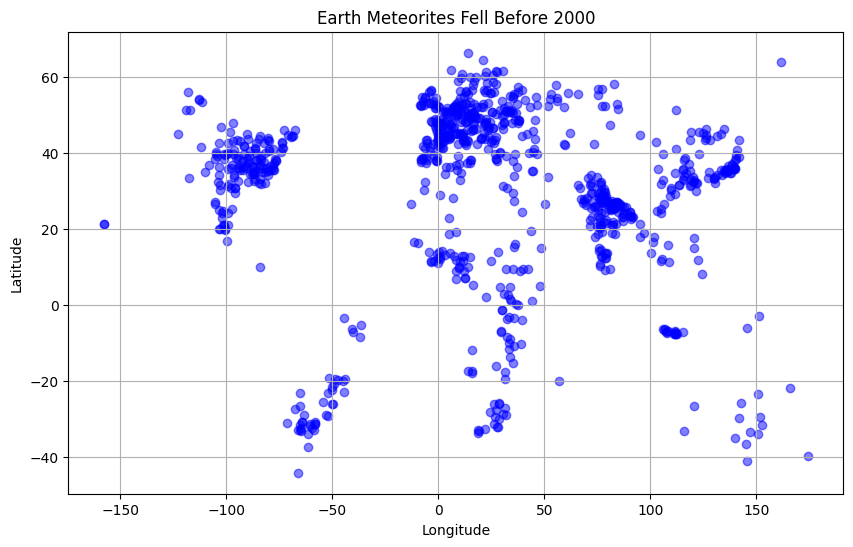

In [30]:
# Plot 1: Earth meteorites that fell before 2000
plt.figure(figsize=(10, 6))
plt.scatter(earth_meteorites_before_2000['reclong'], earth_meteorites_before_2000['reclat'], color='blue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earth Meteorites Fell Before 2000')
plt.grid(True)
plt.show()

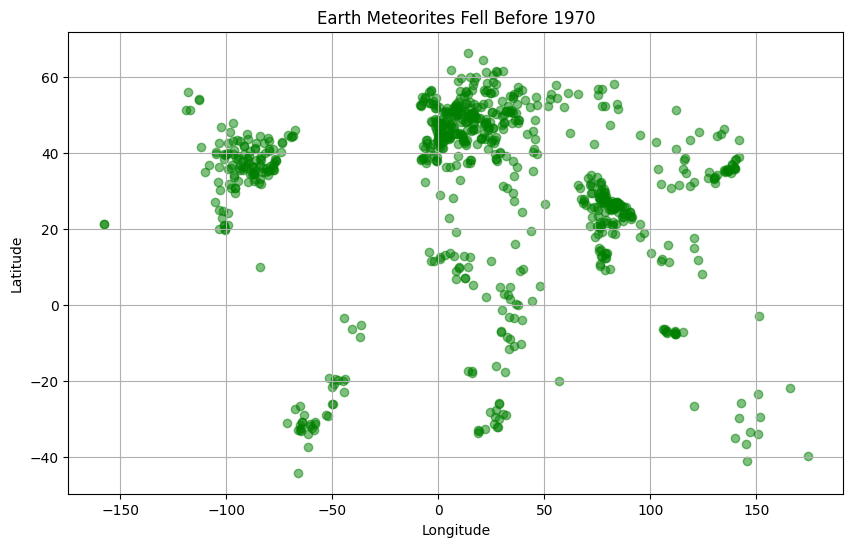

In [31]:
# Plot 2: Earth meteorites' coordinates that fell before 1970
plt.figure(figsize=(10, 6))
plt.scatter(earth_meteorites_before_1970['reclong'], earth_meteorites_before_1970['reclat'], color='green', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earth Meteorites Fell Before 1970')
plt.grid(True)
plt.show()

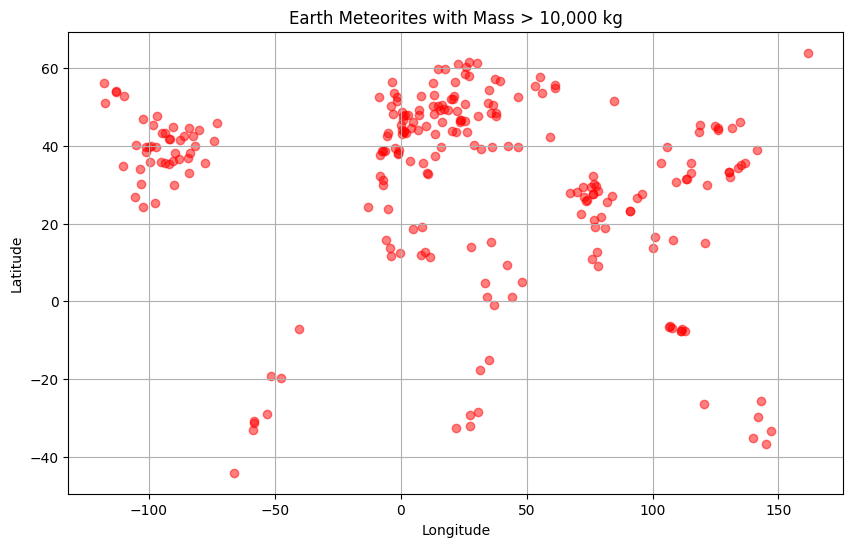

In [32]:
# Plot 3: Earth meteorites with a mass greater than 10,000 kg
plt.figure(figsize=(10, 6))
plt.scatter(earth_meteorites_mass_gt_10000kg['reclong'], earth_meteorites_mass_gt_10000kg['reclat'], color='red', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earth Meteorites with Mass > 10,000 kg')
plt.grid(True)
plt.show()


Question 5 -
Write a program to download the data from the given API link and then extract the following data with
proper formatting

In [1]:
import requests
# API link
api_link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send GET request to the API
response = requests.get(api_link)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()

    # Extracting show information
    show_name = data["name"]
    show_language = data["language"]
    show_genre = data["genres"]
    show_summary =data["summary"]

    # Printing show information
    print("Show Name:", show_name)
    print("Language:", show_language)
    print("Genre:", ", ".join(show_genre))
    print("Summary:", show_summary)
    print()

    # Extracting episode information
    episodes = data["_embedded"]["episodes"]

    print("Episode Information:")
    print("---------------------")

    for episode in episodes:
        episode_id = episode["id"]
        episode_url = episode["url"]
        episode_name = episode["name"]
        episode_season = episode["season"]
        episode_number = episode["number"]
        episode_type = episode["type"]
        episode_airdate = episode["airdate"]
        episode_airtime = episode["airtime"]
        episode_runtime = episode["runtime"]
        episode_rating = episode["rating"]["average"]
        episode_summary = episode["summary"]
        episode_image_medium = episode["image"]["medium"]
        episode_image_original = episode["image"]["original"]

        # Printing episode information
        print("ID:", episode_id)
        print("URL:", episode_url)
        print("Name:", episode_name)
        print("Season:", episode_season)
        print("Number:", episode_number)
        print("Type:", episode_type)
        print("Airdate:", episode_airdate)
        print("Airtime:", episode_airtime)
        print("Runtime:", episode_runtime)
        print("Average Rating:", episode_rating)
        print("Summary:", episode_summary)
        print("Medium Image Link:", episode_image_medium)
        print("Original Image Link:", episode_image_original)
        print()
else:
    print("Failed to retrieve data from the API.")







Show Name: Westworld
Language: English
Genre: Drama, Science-Fiction, Western
Summary: <p><b>Westworld</b> is a dark odyssey about the dawn of artificial consciousness and the evolution of sin. Set at the intersection of the near future and the reimagined past, it explores a world in which every human appetite, no matter how noble or depraved, can be indulged.</p>

Episode Information:
---------------------
ID: 869671
URL: https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original
Name: The Original
Season: 1
Number: 1
Type: regular
Airdate: 2016-10-02
Airtime: 21:00
Runtime: 68
Average Rating: 8
Summary: <p>A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.</p>
Medium Image Link: https://static.tvmaze.com/upload

Question 6 -
Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%
● Get all Pokemons that have less than 4 weaknesses
● Get all Pokemons that have no multipliers at all
● Get all Pokemons that do not have more than 2 evolutions
● Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format

In [4]:
import requests

# API link
api_link = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

# Send GET request to the API
response = requests.get(api_link)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()

    # Get all Pokemons whose spawn rate is less than 5%
    print("Pokemons with spawn rate less than 5%:")
    less_than_5_spawn_rate = [pokemon["name"] for pokemon in data["pokemon"] if pokemon.get("spawn_chance", 0) < 5]
    for pokemon in less_than_5_spawn_rate:
        print(pokemon)
    print()

    # Get all Pokemons that have less than 4 weaknesses
    print("Pokemons with less than 4 weaknesses:")
    less_than_4_weaknesses = [pokemon["name"] for pokemon in data["pokemon"] if len(pokemon.get("weaknesses", [])) < 4]
    for pokemon in less_than_4_weaknesses:
        print(pokemon)
    print()

    # Get all Pokemons that have no multipliers at all
    print("Pokemons with no multipliers:")
    no_multipliers = [pokemon["name"] for pokemon in data["pokemon"] if not pokemon.get("multipliers")]
    for pokemon in no_multipliers:
        print(pokemon)
    print()

    # Get all Pokemons that do not have more than 2 evolutions
    print("Pokemons with no more than 2 evolutions:")
    less_than_2_evolutions = [pokemon["name"] for pokemon in data["pokemon"] if len(pokemon.get("next_evolution", [])) <= 2]
    for pokemon in less_than_2_evolutions:
        print(pokemon)
    print()

    # Get all Pokemons whose spawn time is less than 300 seconds
    print("Pokemons with spawn time less than 300 seconds:")
    less_than_300_spawn_time = [pokemon["name"] for pokemon in data["pokemon"] if pokemon.get("spawn_time") != "N/A" and int(pokemon.get("spawn_time", "0:00").split(":")[0]) * 60 + int(pokemon.get("spawn_time", "0:00").split(":")[1]) < 300]
    for pokemon in less_than_300_spawn_time:
        print(pokemon)
    print()

    # Get all Pokemon who have more than two types of capabilities
    print("Pokemons with more than two types of capabilities:")
    more_than_2_types = [pokemon["name"] for pokemon in data["pokemon"] if len(pokemon.get("type", [])) > 2]
    for pokemon in more_than_2_types:
        print(pokemon)
    print()

else:
    print("Failed to retrieve data from the API.")


Pokemons with spawn rate less than 5%:
Bulbasaur
Ivysaur
Venusaur
Charmander
Charmeleon
Charizard
Squirtle
Wartortle
Blastoise
Caterpie
Metapod
Butterfree
Kakuna
Beedrill
Pidgeotto
Pidgeot
Raticate
Spearow
Fearow
Ekans
Arbok
Pikachu
Raichu
Sandshrew
Sandslash
Nidoran ♀ (Female)
Nidorina
Nidoqueen
Nidoran ♂ (Male)
Nidorino
Nidoking
Clefairy
Clefable
Vulpix
Ninetales
Jigglypuff
Wigglytuff
Golbat
Oddish
Gloom
Vileplume
Paras
Parasect
Venonat
Venomoth
Diglett
Dugtrio
Meowth
Persian
Psyduck
Golduck
Mankey
Primeape
Growlithe
Arcanine
Poliwag
Poliwhirl
Poliwrath
Abra
Kadabra
Alakazam
Machop
Machoke
Machamp
Bellsprout
Weepinbell
Victreebel
Tentacool
Tentacruel
Geodude
Graveler
Golem
Ponyta
Rapidash
Slowpoke
Slowbro
Magnemite
Magneton
Farfetch'd
Doduo
Dodrio
Seel
Dewgong
Grimer
Muk
Shellder
Cloyster
Gastly
Haunter
Gengar
Onix
Drowzee
Hypno
Krabby
Kingler
Voltorb
Electrode
Exeggcute
Exeggutor
Cubone
Marowak
Hitmonlee
Hitmonchan
Lickitung
Koffing
Weezing
Rhyhorn
Rhydon
Chansey
Tangela
Kangaskhan


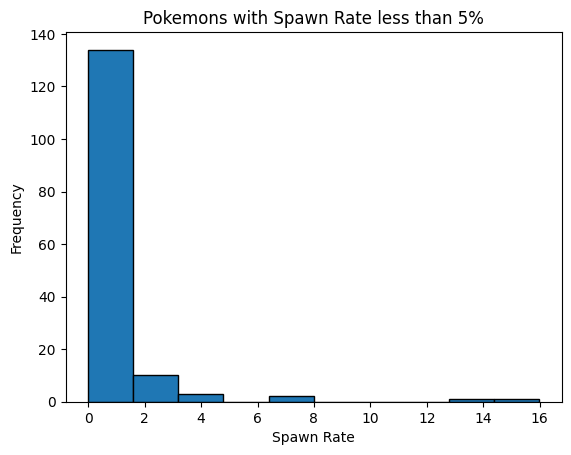

In [7]:
import matplotlib.pyplot as plt


# Get all Pokemons whose spawn rate is less than 5%
spawn_rates = [pokemon["spawn_chance"] for pokemon in data["pokemon"] if pokemon.get("spawn_chance") is not None]
plt.hist(spawn_rates, bins=10, edgecolor='black')
plt.xlabel("Spawn Rate")
plt.ylabel("Frequency")
plt.title("Pokemons with Spawn Rate less than 5%")
plt.show()

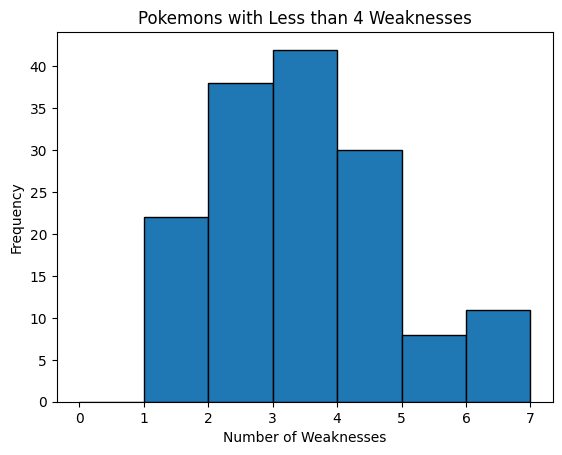

In [9]:
# Get all Pokemons that have less than 4 weaknesses
num_weaknesses = [len(pokemon.get("weaknesses", [])) for pokemon in data["pokemon"]]
plt.hist(num_weaknesses, bins=range(8), edgecolor='black')
plt.xlabel("Number of Weaknesses")
plt.ylabel("Frequency")
plt.title("Pokemons with Less than 4 Weaknesses")
plt.show()

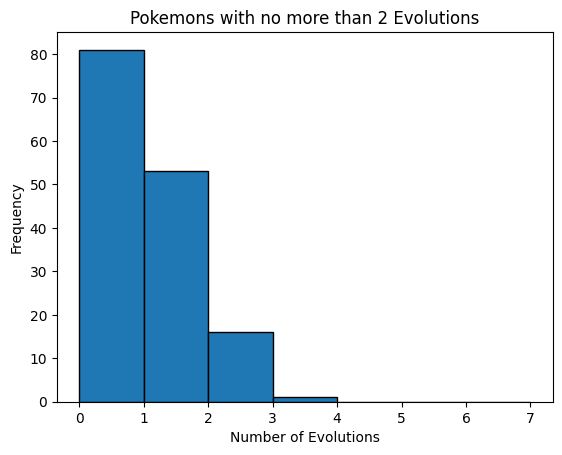

In [10]:
# Get all Pokemons that do not have more than 2 evolutions
num_evolutions = [len(pokemon.get("next_evolution", [])) for pokemon in data["pokemon"]]
plt.hist(num_evolutions, bins=range(8), edgecolor='black')
plt.xlabel("Number of Evolutions")
plt.ylabel("Frequency")
plt.title("Pokemons with no more than 2 Evolutions")
plt.show()


Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [7]:
import requests

url = "https://data.nasa.gov/resource/y77d-th95.json"

# Retrieve all Earth meteorites that fell before the year 2000
query_params = {
    "$where": "year < '2000'",
    "$limit": 50000  
}

response = requests.get(url, params=query_params)
meteorites_before_2000 = response.json()

print("Earth meteorites before 2000:")
for meteorite in meteorites_before_2000:
    print(meteorite)




Earth meteorites before 2000:
{'name': 'Nogata', 'id': '16988', 'nametype': 'Valid', 'recclass': 'L6', 'mass': '472', 'fall': 'Fell', 'year': '0861-01-01T00:00:00.000', 'reclat': '33.725000', 'reclong': '130.750000', 'geolocation': {'type': 'Point', 'coordinates': [130.75, 33.725]}}
{'name': 'Narni', 'id': '16914', 'nametype': 'Valid', 'recclass': 'Stone-uncl', 'fall': 'Fell', 'year': '0921-01-01T00:00:00.000', 'reclat': '42.516670', 'reclong': '12.516670', 'geolocation': {'type': 'Point', 'coordinates': [12.51667, 42.51667]}}
{'name': 'Elbogen', 'id': '7823', 'nametype': 'Valid', 'recclass': 'Iron, IID', 'mass': '107000', 'fall': 'Fell', 'year': '1400-01-01T00:00:00.000', 'reclat': '50.183330', 'reclong': '12.733330', 'geolocation': {'type': 'Point', 'coordinates': [12.73333, 50.18333]}}
{'name': 'Rivolta de Bassi', 'id': '22614', 'nametype': 'Valid', 'recclass': 'Stone-uncl', 'mass': '103.3', 'fall': 'Fell', 'year': '1491-01-01T00:00:00.000', 'reclat': '45.483330', 'reclong': '9.5166

In [8]:
# Retrieve Earth meteorites' coordinates that fell before the year 1970
query_params = {
    "$where": "year < '1970'",
    "$select": "reclat,reclong",
    "$limit": 50000  
}

response = requests.get(url, params=query_params)
meteorites_coordinates_before_1970 = response.json()

print("\nEarth meteorites coordinates before 1970:")
for meteorite in meteorites_coordinates_before_1970:
    if "reclat" in meteorite and "reclong" in meteorite:
        print("Latitude:", meteorite["reclat"])
        print("Longitude:", meteorite["reclong"])
        print()




Earth meteorites coordinates before 1970:
Latitude: 33.725000
Longitude: 130.750000

Latitude: 42.516670
Longitude: 12.516670

Latitude: 50.183330
Longitude: 12.733330

Latitude: 45.483330
Longitude: 9.516670

Latitude: 47.866670
Longitude: 7.350000

Latitude: 44.066670
Longitude: 12.100000

Latitude: 39.000000
Longitude: -0.033330

Latitude: -27.466670
Longitude: -60.583330

Latitude: 39.800000
Longitude: 16.200000

Latitude: 27.050000
Longitude: -105.433330

Latitude: 31.000000
Longitude: 75.000000

Latitude: 50.383330
Longitude: -3.950000

Latitude: 51.650000
Longitude: -1.516670

Latitude: 35.078330
Longitude: 136.933330

Latitude: 51.533330
Longitude: 14.883330

Latitude: 44.083330
Longitude: 6.866670

Latitude: 52.533330
Longitude: 9.050000

Latitude: 55.333330
Longitude: 10.333330

Latitude: 58.550000
Longitude: 31.333330

Latitude: 45.416670
Longitude: 11.133330

Latitude: 48.500000
Longitude: 8.000000

Latitude: 34.716670
Longitude: 137.783330

Latitude: 41.366670
Longitude: 

In [9]:
# Retrieve Earth meteorites with a mass greater than 10,000 kg
query_params = {
    "$where": "mass > 10000",
    "$limit": 50000  
}

response = requests.get(url, params=query_params)
meteorites_above_10000kg = response.json()

print("\nEarth meteorites with mass above 10000kg:")
for meteorite in meteorites_above_10000kg:
    print(meteorite)



Earth meteorites with mass above 10000kg:
{'name': 'Sayh al Uhaymir 425', 'id': '35714', 'nametype': 'Valid', 'recclass': 'L5-6', 'mass': '10006.700000000001', 'fall': 'Found', 'year': '2005-01-01T00:00:00.000', 'reclat': '20.930150', 'reclong': '57.145050', 'geolocation': {'type': 'Point', 'coordinates': [57.14505, 20.93015]}}
{'name': 'Reckling Peak A79015', 'id': '22470', 'nametype': 'Valid', 'recclass': 'Mesosiderite-an', 'mass': '10022', 'fall': 'Found', 'year': '1979-01-01T00:00:00.000', 'reclat': '-76.215410', 'reclong': '158.539200', 'geolocation': {'type': 'Point', 'coordinates': [158.5392, -76.21541]}}
{'name': 'Dhofar 069', 'id': '6768', 'nametype': 'Valid', 'recclass': 'H4', 'mass': '10083', 'fall': 'Found', 'year': '1999-01-01T00:00:00.000', 'reclat': '19.158670', 'reclong': '54.731000', 'geolocation': {'type': 'Point', 'coordinates': [54.731, 19.15867]}}
{'name': 'Northwest Africa 4209', 'id': '34481', 'nametype': 'Valid', 'recclass': 'H5/6', 'mass': '10100', 'fall': 'Fo

In [59]:
pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

In [10]:
import requests
import matplotlib.pyplot as plt

# Fetch data from the provided link
response = requests.get("http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes")
show_data = response.json()

# Get all the overall ratings for each season
season_ratings = {}
for episode in show_data["_embedded"]["episodes"]:
    season_number = episode["season"]
    rating = episode["rating"]["average"]
    if season_number not in season_ratings:
        season_ratings[season_number] = []
    season_ratings[season_number].append(rating)

In [11]:
season_numbers = sorted(season_ratings.keys())
season_avg_ratings = [sum(season_ratings[season]) / len(season_ratings[season]) for season in season_numbers]


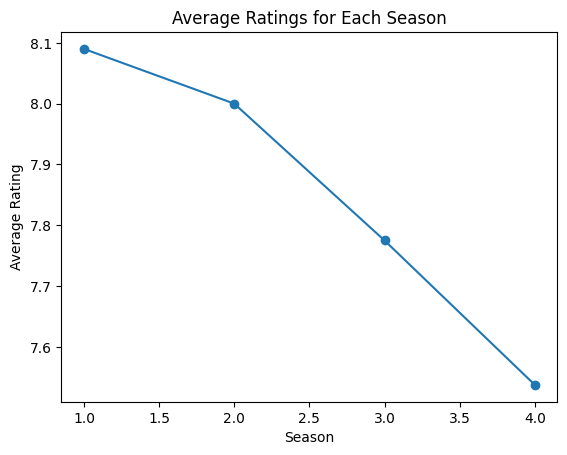

In [12]:
plt.plot(season_numbers, season_avg_ratings, marker="o")
plt.xlabel("Season")
plt.ylabel("Average Rating")
plt.title("Average Ratings for Each Season")
plt.show()

In [13]:
# Get all the episode names with an average rating above 8 for every season
highly_rated_episodes = {}
for episode in show_data["_embedded"]["episodes"]:
    season_number = episode["season"]
    episode_name = episode["name"]
    rating = episode["rating"]["average"]
    if rating > 8:
        if season_number not in highly_rated_episodes:
            highly_rated_episodes[season_number] = []
        highly_rated_episodes[season_number].append(episode_name)

# Print all the episode names with an average rating above 8 for every season
for season, episodes in highly_rated_episodes.items():
    print("Season", season, "Highly Rated Episodes:")
    for episode in episodes:
        print(episode)
    print()

Season 1 Highly Rated Episodes:
Trompe L'Oeil
The Well-Tempered Clavier
The Bicameral Mind

Season 2 Highly Rated Episodes:
Kiksuya
Vanishing Point
The Passenger



In [21]:
# Get all the episode names that aired before May 2019
episodes_before_may_2019 = []
for episode in show_data["_embedded"]["episodes"]:
    air_date = episode["airdate"]
    if air_date < "2019-05-01":
        episodes_before_may_2019.append(episode["name"])

# Print all the episode names that aired before May 2019
print("Episodes Aired Before May 2019:")
for episode in episodes_before_may_2019:
    print(episode)

Episodes Aired Before May 2019:
The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger


In [22]:
# Get the episode name from each season with the highest and lowest rating
highest_rated_episodes = {}
lowest_rated_episodes = {}
for season_number in season_numbers:
    episodes_in_season = [episode for episode in show_data["_embedded"]["episodes"] if episode["season"] == season_number]
    episodes_in_season.sort(key=lambda x: x["rating"]["average"], reverse=True)
    highest_rated_episodes[season_number] = episodes_in_season[0]["name"]
    lowest_rated_episodes[season_number] = episodes_in_season[-1]["name"]

# Print the episode name from each season with the highest and lowest rating
for season_number in season_numbers:
    print("Season", season_number, "Highest Rated Episode:", highest_rated_episodes[season_number])
    print("Season", season_number, "Lowest Rated Episode:", lowest_rated_episodes[season_number])
    print()

Season 1 Highest Rated Episode: The Bicameral Mind
Season 1 Lowest Rated Episode: The Stray

Season 2 Highest Rated Episode: Kiksuya
Season 2 Lowest Rated Episode: Akane No Mai

Season 3 Highest Rated Episode: Parce Domine
Season 3 Lowest Rated Episode: Passed Pawn

Season 4 Highest Rated Episode: Zhuangzi
Season 4 Lowest Rated Episode: The Auguries



In [25]:
# Get the summary for the most popular (highest rated) episode in every season
most_popular_episodes = {}
for episode in show_data["_embedded"]["episodes"]:
    season_number = episode["season"]
    rating = episode["rating"]["average"]
    summary = episode["summary"]
    
    if season_number not in most_popular_episodes or rating > most_popular_episodes[season_number]["rating"]:
        most_popular_episodes[season_number] = {
            "rating": rating,
            "summary": summary
        }

# Print the summary for the most popular episode in every season
for season_number, episode_info in most_popular_episodes.items():
    print("Season", season_number, "Most Popular Episode Summary:")
    print("Rating:", episode_info["rating"])
    print("Summary:", episode_info["summary"])
    print()

Season 1 Most Popular Episode Summary:
Rating: 8.7
Summary: <p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.</p>

Season 2 Most Popular Episode Summary:
Rating: 8.7
Summary: <p>Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.</p>

Season 3 Most Popular Episode Summary:
Rating: 8
Summary: <p>If you're stuck in a loop, try walking in a straight line.</p>

Season 4 Most Popular Episode Summary:
Rating: 7.8
Summary: <p>God is bored.</p>



Question 10 -
Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.
Note -
1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

In [90]:
def count_pos_tags(text):
    # Initialize counts dictionary
    counts = {
        "verbs": 0,
        "nouns": 0,
        "pronouns": 0,
        "adjectives": 0
    }

    # Convert the paragraph to lowercase for case-insensitive matching
    lower_text = text.lower()

    # Split the paragraph into individual words
    words = lower_text.split()

    # Iterate over words and count each part-of-speech category
    for word in words:
        if word.endswith(("ing", "s", "es")):
            counts["verbs"] += 1
        elif word.endswith(("ly", "ful", "able", "ous")):
            counts["adjectives"] += 1
        elif word.isalpha():
            counts["nouns"] += 1

    # Calculate the count of pronouns as the difference between total words and other counts
    total_words = len(words)
    counts["pronouns"] = total_words - (counts["verbs"] + counts["nouns"] + counts["adjectives"])

    return counts

paragraph = 'Abstraction is the concept of object-oriented programming that "shows" only essential attributes and "hides" unnecessary information. The main purpose of abstraction is hiding the unnecessary details from the users.'
counts = count_pos_tags(paragraph)
print(counts)


{'verbs': 6, 'nouns': 17, 'pronouns': 5, 'adjectives': 1}


In [91]:
paragraph='Polymorphism means "many forms", and it occurs when we have many classes that are related to each other by inheritance. Like we specified in the previous chapter; Inheritance lets us inherit attributes and methods from another class. Polymorphism uses those methods to perform different tasks.'
counts = count_pos_tags(paragraph)
print(counts)

{'verbs': 10, 'nouns': 29, 'pronouns': 6, 'adjectives': 0}
